# Matplotlib bar chart storyteilling

In [3]:
import matplotlib
import pandas as pd
import duckdb
from constans import GRAY_1, GRAY_2, GRAY_3, BLUE_1

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [11]:
df_quantety_brand = duckdb.query(
    """--sql
    SELECT 
        make AS Brand,
        SUM(quantity) as Quantity
    FROM df
    GROUP BY Brand
    ORDER BY Quantity DESC
"""
).df().set_index("Brand")


df_quantety_brand

,Quantity
Brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0
...,...
Secma,1.0
Westfield,1.0
McLaren,1.0


### Bar Chart

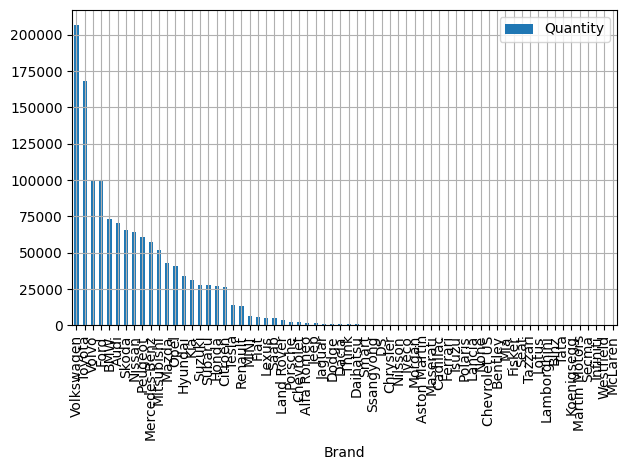

In [5]:
ax = df_quantety_brand.plot(kind="bar")
ax.grid()
fig = ax.get_figure()
fig.tight_layout()

In [6]:
df_quantety_brand.iloc[:10]

,Quantity
Brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0
Audi,70475.0
Skoda,66007.0
Nissan,64535.0
Peugeot,61033.0


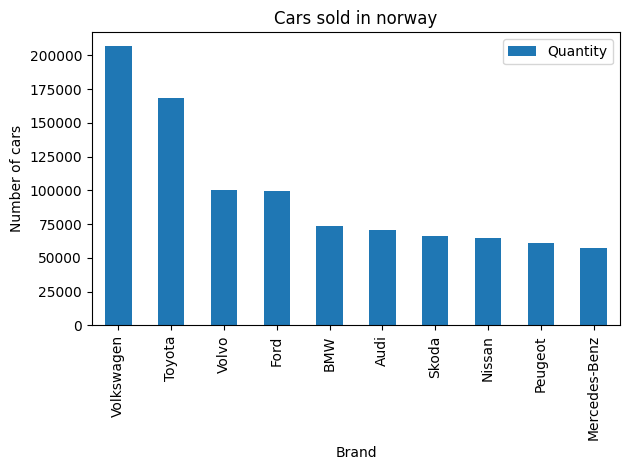

In [7]:
ax = df_quantety_brand.iloc[:10].plot(kind="bar", title="Cars sold in norway", ylabel="Number of cars")
fig = ax.get_figure()
fig.tight_layout()

fig.savefig("figures/bar_storytelling.png", dpi=400)

## Apply data storytelling

- remove clutter
- contrast
- color sparingly
- describel titel 
- posisoning lables
- proximity principle with annotation
- precentage insted of values
- horizontel bar

In [8]:
# precentage
df_precentage = df_quantety_brand["Quantity"] / df_quantety_brand["Quantity"].sum() * 100

df_precentage


Brand
Volkswagen       15.340063
Toyota           12.482984
Volvo             7.417851
Ford              7.401225
BMW               5.441826
                   ...    
Martin Motors     0.000074
Secma             0.000074
Infiniti          0.000074
Westfield         0.000074
McLaren           0.000074
Name: Quantity, Length: 66, dtype: float64

In [9]:
df_precentage_top10 = df_precentage.iloc[:10]
colors = [GRAY_1]*len(df_precentage_top10)

colors[4]=BLUE_1
colors

['#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#1E4E5C',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC']

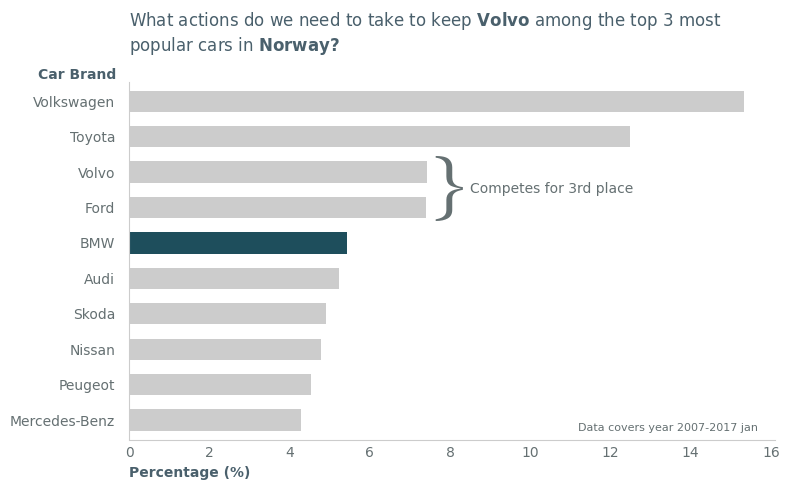

In [10]:
ax = df_precentage_top10.plot(kind="barh", ylabel="Number of cars", figsize=(8,5), width=0.6,color=colors)

ax.invert_yaxis()

# remove clutter
ax.spines[["top", "right"]].set_visible(False)

# Contrast
ax.spines[["left", "bottom"]].set_color(GRAY_1)
ax.tick_params(axis="both", colors=GRAY_2, labelsize=10, length=0, pad=5)
ax.tick_params(axis="y", pad=10)

# descriptive title and labels - Call to action (CTA)
ax.set_title(
    "What actions do we need to take to keep " 
    + r"$\bf{Volvo}$" #Latex mode
    + " among the top 3 most\npopular cars in " 
    + r"$\bf{Norway?}$",
    loc="left",
    color = GRAY_3,
    pad = 22
)

ax.set_xlabel("Percentage (%)", color= GRAY_3, fontweight="bold", loc="left")
ax.set_ylabel("Car Brand", color= GRAY_3, fontweight="bold", rotation=0)
ax.yaxis.set_label_coords(-0.08,1)

# Annotations - proximity principle
ax.annotate(xy=(7.5,3.01), text="}", fontsize=55, color=GRAY_2, family="Times")
ax.annotate(xy=(8.5,2.6), text="Competes for 3rd place", fontsize=10, color=GRAY_2)
ax.annotate(xy=(11.2,9.3), text="Data covers year 2007-2017 jan", fontsize=8, color=GRAY_2)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/2_bar_storytelling.png", dpi=400)